# Proyecto 2

----
Nancy Mazariegos

Santiago Pereira

Brandon Reyes

Andre Jo

----

## Análisis Exploratorio

### 1. Planteamiento inicial del problema:

#### a. Situación Problemática

Los mercados de commodities (petróleo, gas, metales, granos, etc.) son altamente volátiles y están influenciados por factores económicos, políticos y climáticos. Esta volatilidad dificulta la predicción de precios futuros, lo que representa un reto para empresas de comercio, bancos de inversión y gobiernos que dependen de una planificación estratégica.

#### b. Problema Científico

¿Es posible desarrollar un modelo de series de tiempo que prediga con precisión la evolución de precios de commodities utilizando datos históricos y técnicas de aprendizaje automático?

#### c. Objetivos

Objetivo General:

Construir un modelo predictivo basado en series de tiempo que permita estimar el precio futuro de commodities con alta precisión.

Objetivos Específicos:

- Realizar un análisis exploratorio de datos (EDA) para identificar patrones de tendencia, estacionalidad y volatilidad.

- Implementar técnicas de preprocesamiento (limpieza, imputación de valores faltantes, normalización, creación de features de calendario/ventanas temporales).

- Comparar diferentes enfoques de modelado (ARIMA, Prophet, LSTM, Transformers para time series) y evaluar métricas de desempeño.

## 2. Investigación preliminar

El mercado de commodities (petróleo, gas, metales, granos, entre otros) se distingue por ser muy cambiante y sensible a distintos factores externos, como la oferta y la demanda mundial, los tipos de cambio, las políticas económicas, el clima y hasta situaciones geopolíticas. Esta volatilidad complica mucho hacer predicciones confiables, por lo que en los últimos años se han desarrollado modelos que ayudan a anticipar tendencias de precios y sirven como apoyo en la toma de decisiones para empresas, inversionistas y gobiernos.

Al revisar la literatura, se encuentran varios enfoques comunes en problemas de predicción de precios:

 - Modelos estadísticos de series de tiempo: como ARIMA, SARIMA y Holt-Winters, que buscan capturar tendencias y estacionalidad.

 - Modelos de machine learning: por ejemplo regresiones múltiples, Random Forest, Gradient Boosting y SVM, que permiten manejar muchas variables al mismo tiempo.

 - Modelos de deep learning: redes neuronales como LSTM, GRU o incluso Transformers, que aprenden relaciones más complejas y de largo plazo en las series.

 - Preprocesamiento de datos: uso de retornos logarítmicos, diferenciación para hacer las series más estables, normalización, imputación de valores perdidos y creación de lags o medias móviles.

 - Reducción de dimensionalidad: técnicas como PCA o selección de variables importantes, que resultan útiles cuando se trabaja con miles de columnas.

El desafío Mitsui Commodity Prediction Challenge combina todos estos elementos, ya que integra información de varios mercados financieros (LME, JPX, Forex y acciones de EE. UU.) y pide predecir retornos en horizontes cortos de 1 a 4 días. Esto hace necesario aplicar métodos modernos de análisis de datos y aprendizaje automático para lograr buenos resultados.

### 3) Análisis inicial del rpoblema y los datos disponibles 

El reto se centra en predecir cómo se comportarán los precios y retornos de distintos commodities en los próximos días (entre 1 y 4 días adelante) usando datos históricos de diferentes mercados financieros. Para esto, se ponen a disposición varios archivos:

 - train.csv: contiene el set de entrenamiento, con cerca de 1,977 columnas (features) que representan información de metales, divisas, acciones y futuros.

 - train_labels.csv: incluye aproximadamente 424 objetivos (targets), que son retornos individuales de commodities y también diferencias entre pares.

 - target_pairs.csv: describe las combinaciones de commodities y sus etiquetas, ayudando a entender mejor qué representa cada variable objetivo.

 - test.csv: es similar a train.csv en estructura, pero sin etiquetas, y se utiliza para generar las predicciones finales.


## Observaciones iniciales

1. Cantidad de variables: el hecho de tener casi 2,000 features y más de 400 targets hace que sea un problema multivariable de gran escala. Esto obliga a usar técnicas de selección o reducción de datos.

2. Orden temporal: como es un problema de series de tiempo, se debe respetar la secuencia cronológica para no introducir datos del futuro en el entrenamiento (data leakage).

3. Datos faltantes: es probable que haya valores nulos en fechas de feriados o cierres de mercados. Habrá que decidir si se imputan (con interpolación o rellenado) o si se eliminan.

4. Volatilidad y valores atípicos: los precios pueden presentar picos o caídas fuertes ligados a crisis económicas, cambios políticos o eventos naturales. Es importante detectarlos y decidir cómo tratarlos.

5. Predicciones a corto plazo: el hecho de que las etiquetas estén definidas en lags de 1 a 4 días muestra que el enfoque es de corto plazo, donde los patrones más recientes podrían tener más peso que las tendencias históricas largas. 

### Preguntas iniciales para guiar el análisis

 - ¿Qué tan marcados son los patrones de estacionalidad en los distintos commodities?
 - ¿Cuáles presentan correlaciones más fuertes entre sí?
 - ¿Cuál es la magnitud de los valores faltantes y cómo se distribuyen?
 - ¿Qué commodities son más volátiles y cuáles más estables, por lo que podrían ser más fáciles de predecir?

## 4.Preprocesamiento de datos: describir y documentar las tareas de limpieza realizadas.

Se realiza la carga de datos csv de entraniemto y de prueba para observa que se puede realizar de limpieza. Los datos fueron extraidos por un rango de los últimos 90 días del csv de entrenamiento.  

In [23]:
import pandas as pd

#Carga de datos para limpieza de prueba

# Read the CSV into a DataFrame
df_test = pd.read_csv('datos/test.csv')

# Print the whole DataFrame
df_test


df_test = df_test.fillna(method='ffill').fillna(method='bfill')

C:\Users\15-4JO\AppData\Local\Temp\ipykernel_5716\3999435365.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test = df_test.fillna(method='ffill').fillna(method='bfill')


## Carga de datos de entrenamiento que fueron alrededor de datos financieros históricos relacionados con materias primas, precios de cierre, volúmenes comerciales, tipos de cambio, etc.

In [ ]:
import pandas as pd

#Carga de datos para limpieza de prueba

# Read the CSV into a DataFrame
df_train = pd.read_csv('datos/train.csv')

# Print the whole DataFrame



df_train


df_train = df_train.fillna(method='ffill').fillna(method='bfill')

##Eliminar is scored que son solo valores NA?

C:\Users\15-4JO\AppData\Local\Temp\ipykernel_5716\834970445.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='ffill').fillna(method='bfill')


Primero que todo, se observa que en algunas filas de datos no tienen todas las columnas de información en la cual se marcan como NAN. Por lo tanto se realizara la limpieza de filas con valores nulos. No se van a eliminar solo que se va a sustituir los valores nulos a valores de la fila anterior o la fila siguiente.

In [24]:


# filas totales del dataset
beforetrain = len(df_train)


df_train = df_train.dropna()
# filas despues de limpieza
aftertrain = len(df_train)

removedtrain = beforetrain - aftertrain
print(f"filas eliminadas despues de quitar filas con valores NA para el dataset de entrenamiento:         {removedtrain}")


##hacemos lo mismo para el dataset de prueba
beforetest = len(df_test)

df_test = df_test.dropna()

aftertest = len(df_test)

removedtest = beforetest - aftertest    

print(f"filas eliminadas despues de quitar filas con valores NA para el dataset de prueba:         {removedtest}")







filas eliminadas despues de quitar filas con valores NA para el dataset de entrenamiento:         0
filas eliminadas despues de quitar filas con valores NA para el dataset de prueba:         134


Al observar los datos de entrenamiento y los valores de prueba, ya no se puede realizar más limpieza de datos ya que si realizamos un redondeo de los valores monetarios podemos perder cierta información valiosa.

Ya que limpiamos el dataset vamos a exportar los archivos limpios a la sección de datos para realizar el análisis exploratorio. 

In [34]:
df_test.to_csv("datos/testlimpio.csv", index=False)

df_train.to_csv("datos/trainlimpio.csv", index=False)


## 5.  Análisis exploratorio de datos (EDA):

Para realizar el análisis, se debe de tomar en cuenta el dataset de entrenamiento y de prueba. En este caso se va a combinar los dos datasets para tener las observaciones necesarias para el análisis exploratorio.

Por otro lado no vamos a contar con la columna is_scored del dataset de prueba ya qe no lo incluye en el dataset de entrenamiento. De acuerdo con MITSUI&CO is_scored - es el cálculo de métricas de evaluación.

In [26]:
import pandas as pd


merged = pd.concat([df_train, df_test], ignore_index=True)
# Cargar el dataset
merged = merged.drop('is_scored', axis=1)

merged

# Número de filas (observaciones) y columnas (variables)
print("Filas (observaciones):", merged.shape[0])
print("Columnas (variables):", merged.shape[1])

# Tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(merged.dtypes)

dtype_counts = merged.dtypes.value_counts()

print(dtype_counts)


Filas (observaciones): 1961
Columnas (variables): 558

Tipos de datos por columna:
date_id           int64
LME_AH_Close    float64
LME_CA_Close    float64
LME_PB_Close    float64
LME_ZS_Close    float64
                 ...   
FX_NOKGBP       float64
FX_NOKCHF       float64
FX_ZARCHF       float64
FX_NOKJPY       float64
FX_ZARGBP       float64
Length: 558, dtype: object
float64    557
int64        1
Name: count, dtype: int64


Observamos que existen 558 variables númericas 

Descripción del dataset:

En este inciso debemos de saber las tendencias centras del dataset para observar los datos más valiosos que se repiten más, el promedio o el dato que esta a la mitad del dataset. 

In [27]:
merged.describe()

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,...,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,980.000000,2252.494875,7929.717970,2085.676838,2796.502407,7681.257777,7745.527792,7681.458950,3788.935747,3790.204488,...,1.710787,0.703105,0.856095,0.602847,0.056007,0.082366,0.099372,0.058701,13.096718,0.048583
std,566.236258,399.103323,1524.083655,183.421035,448.846296,3057.633591,3122.787732,3057.890577,720.576907,722.162072,...,0.067369,0.049470,0.036205,0.059288,0.005752,0.007005,0.013947,0.009828,0.969003,0.005338
min,0.000000,1462.000000,4630.000000,1585.500000,1815.500000,4171.000000,4216.000000,4171.000000,2200.000000,2164.000000,...,1.472061,0.579407,0.767636,0.466372,0.045552,0.069614,0.076132,0.042087,9.618859,0.039464
25%,490.000000,1925.000000,6400.000000,1972.500000,2479.500000,5197.000000,5210.000000,5196.000000,3163.000000,3161.000000,...,1.684365,0.663481,0.825814,0.546662,0.050591,0.074915,0.084064,0.048954,12.546578,0.043391
50%,980.000000,2246.500000,8267.000000,2070.000000,2771.000000,6613.000000,6650.000000,6615.000000,3795.000000,3800.000000,...,1.713406,0.719225,0.853417,0.615227,0.056036,0.083721,0.101440,0.058030,13.266953,0.048661
75%,1470.000000,2512.000000,9322.000000,2188.500000,3032.500000,8933.000000,8963.000000,8934.000000,4325.000000,4329.000000,...,1.743424,0.744981,0.883287,0.649179,0.060573,0.087033,0.109417,0.066195,13.808442,0.052472
max,1960.000000,3849.000000,10889.000000,2681.000000,4498.500000,16270.000000,16400.000000,16277.000000,6272.500000,6280.000000,...,1.881218,0.788635,0.950091,0.710020,0.070469,0.094472,0.125403,0.081612,15.314668,0.062025


Debido a que todos los valores son númericos, no se podra realizar un análisis categorica. La única variable que categorica fue eliminada debido a que solo marca valores NA. 

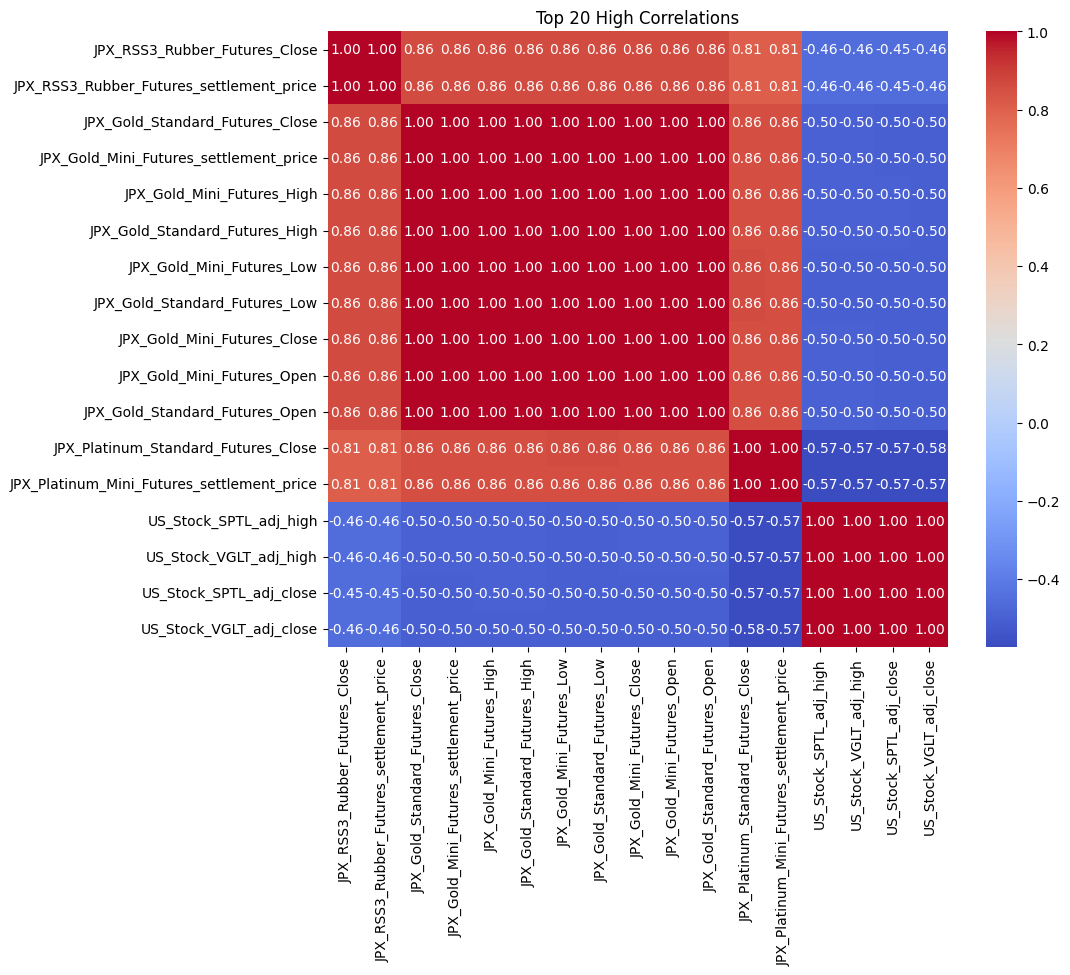

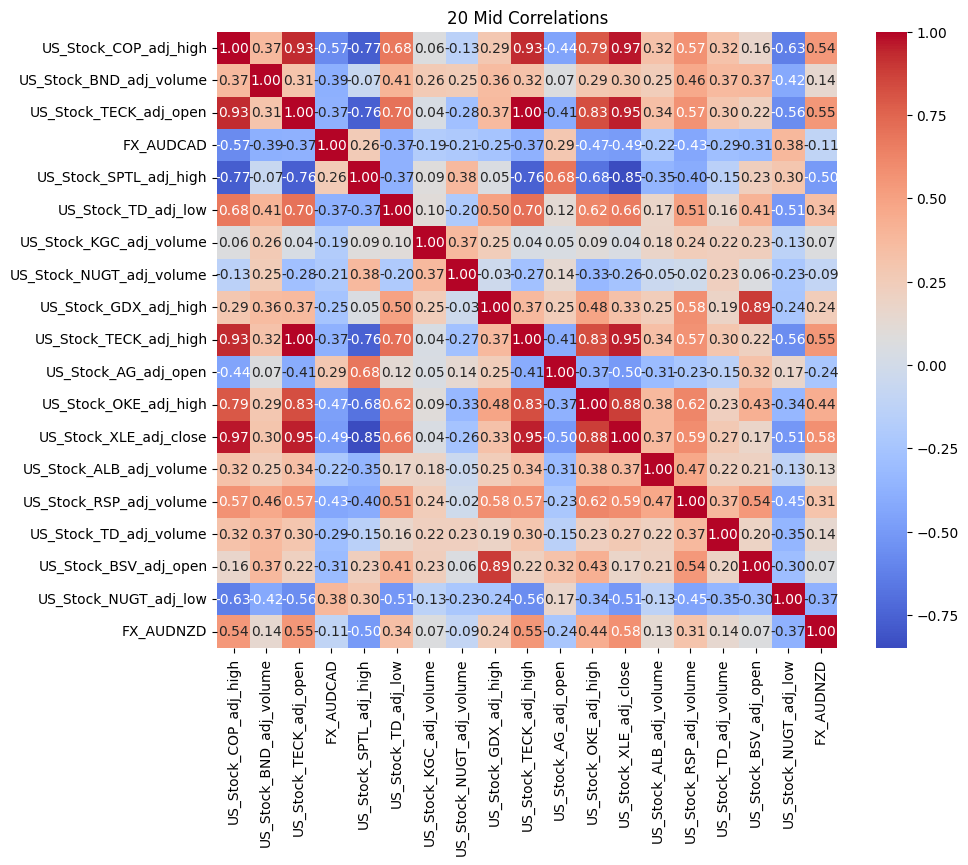

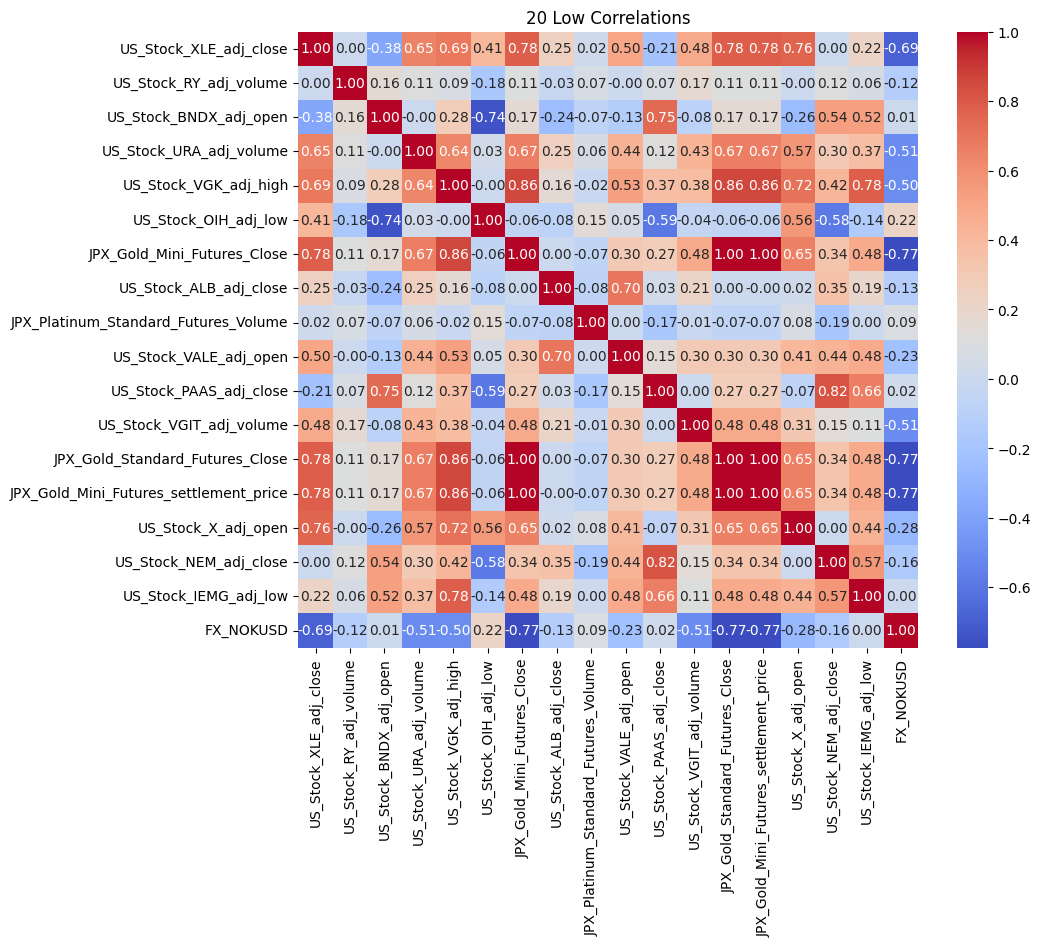

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Se realiza los calculos para la matriz de correlación.
corr_matrix = merged.corr().abs()

# Ya que son 559 valores númericos, no podremos ver todas las correlaciones. Por lo tanto solo vamos a observar los más importantes que son los valores con mayor correlación. Las medias y las correlaciones más bajas. 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

corr_pairs = upper.stack().reset_index()
corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

sorted_corr = corr_pairs.sort_values(by='Correlation', ascending=False)

high_corr = sorted_corr.head(10)
mid_corr = sorted_corr.iloc[len(sorted_corr)//2-5 : len(sorted_corr)//2+5]
low_corr = sorted_corr.tail(10)

def get_vars(df_subset):
    return pd.unique(df_subset[['Var1','Var2']].values.ravel())

# Se realiza los mapas de calor
def plot_heatmap(subset, title):
    vars_to_plot = get_vars(subset)
    plt.figure(figsize=(10,8))
    sns.heatmap(merged[vars_to_plot].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

# High correlation heatmap
plot_heatmap(high_corr, "Top 20 High Correlations")





Debido a que tenemos más de 558 variables. Se seleccionara con variables que tienen mayor correlación y observar tendencias o patrones ante los precios y la fecha.  

El primer mapa de correlaciones muestra que los futuros japoneses de oro (Gold Mini y Standard), platino y caucho presentan correlaciones muy altas entre sí (0.81 a 1.00), lo que refleja que sus precios de apertura, cierre, máximo, mínimo y liquidación se mueven prácticamente en la misma dirección, siendo en gran medida variables redundantes. En contraste, los ETFs de renta fija estadounidense (SPTL y VGLT) presentan correlaciones negativas moderadas (–0.45 a –0.58) con estos futuros, lo que sugiere que cuando suben los commodities, tienden a caer los bonos largos en EE. UU., ofreciendo así un efecto de diversificación en un portafolio combinado.

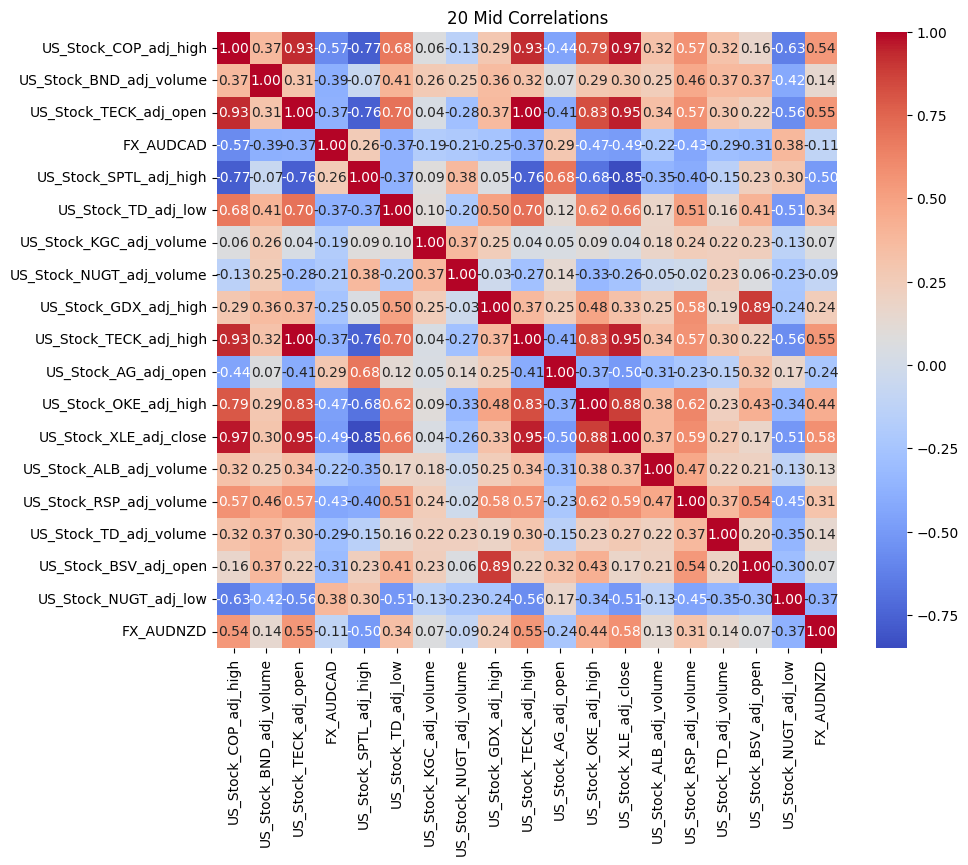

In [31]:
# Mid correlation heatmap
plot_heatmap(mid_corr, "20 Mid Correlations")

En el segundo mapa de correlaciones se observa un panorama más variado: por un lado, algunas acciones como US_Stock_COP_adj_high, US_Stock_TECK_adj_open/high y US_Stock_XLE_adj_close presentan correlaciones muy fuertes y positivas entre sí (0.93–0.97), lo que indica que tienden a moverse en la misma dirección, probablemente por pertenecer al mismo sector energético/minero. En contraste, aparecen correlaciones negativas moderadas a fuertes (–0.6 a –0.7) entre estas mismas acciones y algunos ETFs o divisas como US_Stock_SPTL_adj_high (bonos a largo plazo de EE. UU.) y los cruces de divisas FX_AUDCAD y FX_AUDNZD, lo que refleja dinámicas de mercado opuestas: cuando suben los commodities y energía, tienden a caer los bonos o fortalecerse ciertas monedas. Además, varios volúmenes de transacción (ej. US_Stock_BND_adj_volume, US_Stock_TD_adj_volume) muestran correlaciones más bajas o dispersas, lo cual es esperado ya que reflejan liquidez más que precios.

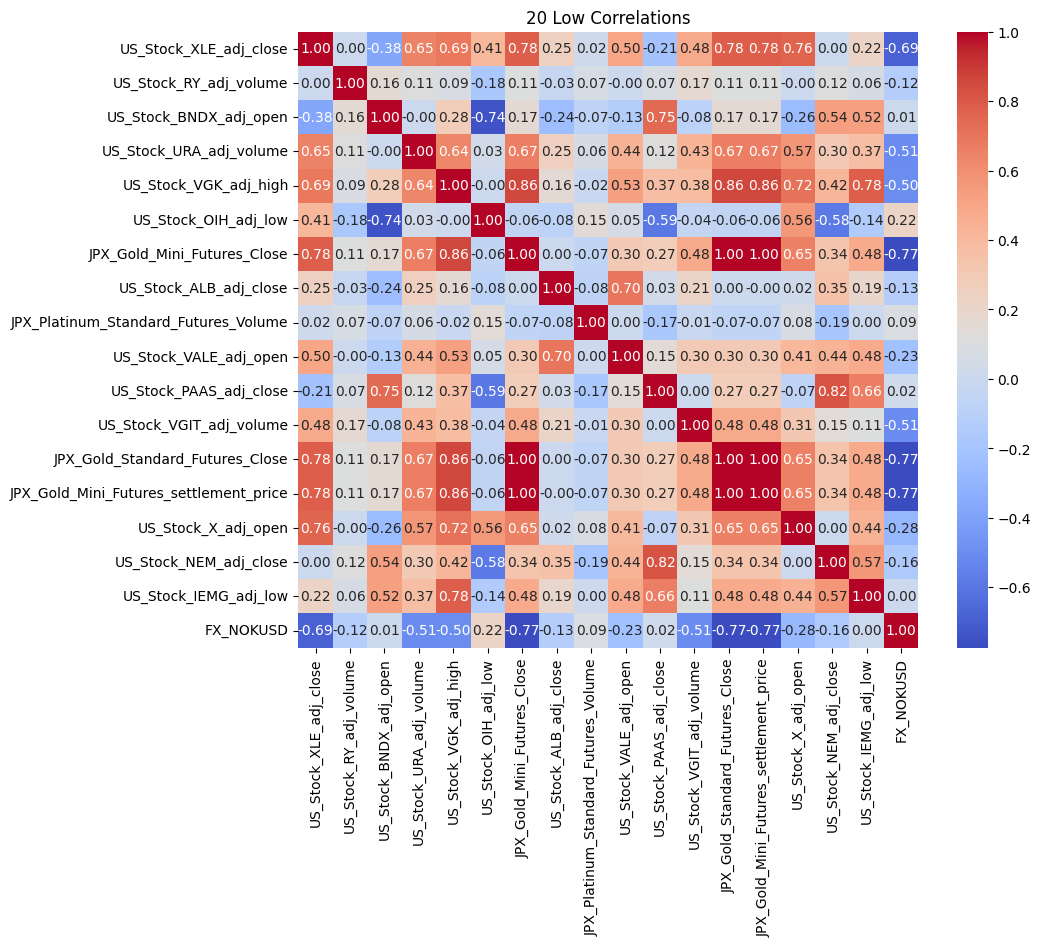

In [32]:

# Low correlation heatmap
plot_heatmap(low_corr, "20 Low Correlations")

En este mapa de bajas correlaciones se observa un comportamiento mucho más disperso: varios activos muestran correlaciones moderadas positivas, pero también aparecen relaciones negativas claras. Por ejemplo, los futuros de oro (JPX_Gold_Mini_Futures_Close, JPX_Gold_Standard_Futures_Close, JPX_Gold_Mini_Futures_settlement_price) tienen correlaciones positivas entre sí (0.67–0.86), pero se relacionan de manera negativa con algunas divisas como FX_NOKUSD (–0.69 a –0.77), indicando que cuando el oro sube, esta paridad tiende a bajar. También se ven correlaciones moderadas en energía y minería, como US_Stock_XLE_adj_close, US_Stock_URA_adj_volume y US_Stock_VGK_adj_high, que muestran cierta sincronía (0.6–0.7). Sin embargo, otros activos como volúmenes de platino o algunos ETFs (ej. US_Stock_BNDX_adj_open) no presentan correlaciones fuertes con la mayoría, lo que refleja independencia relativa.

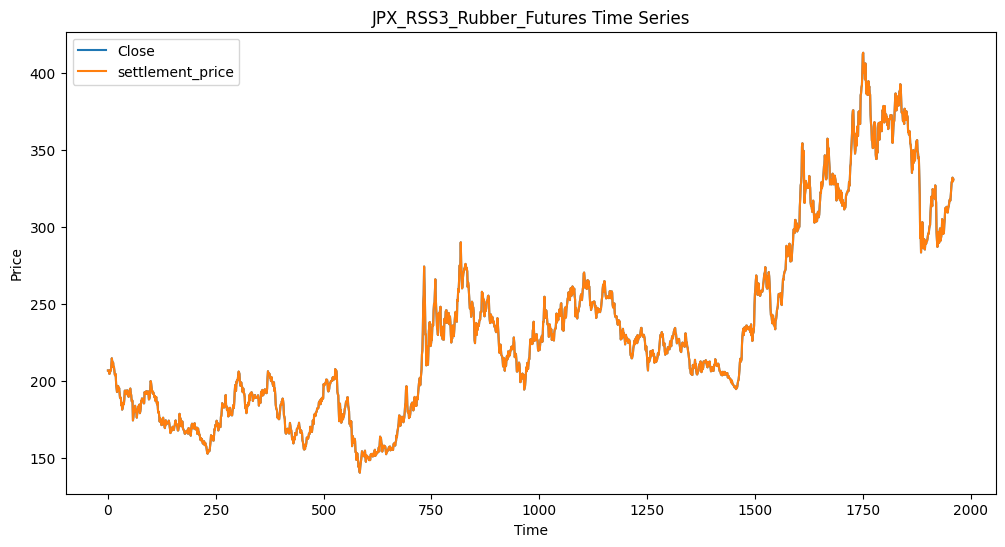

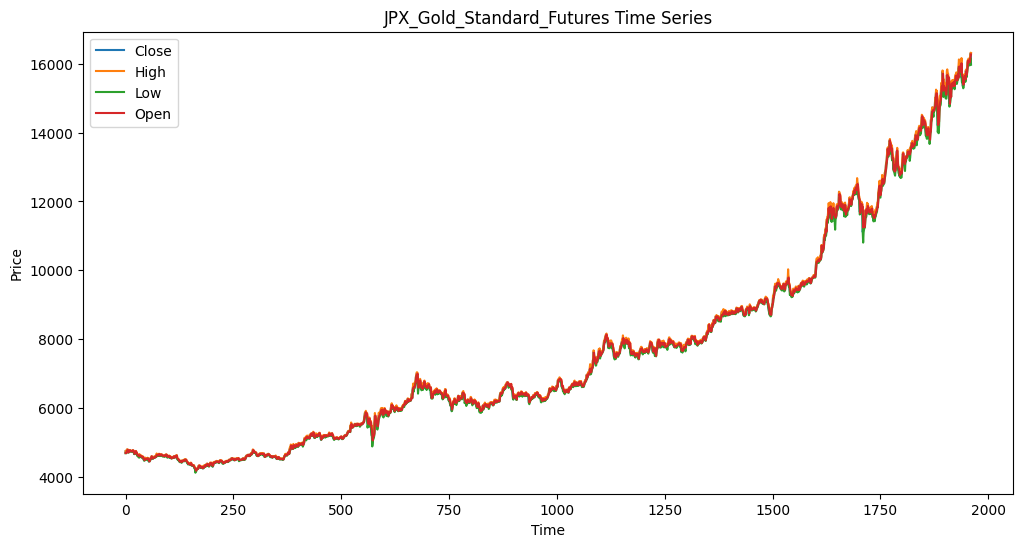

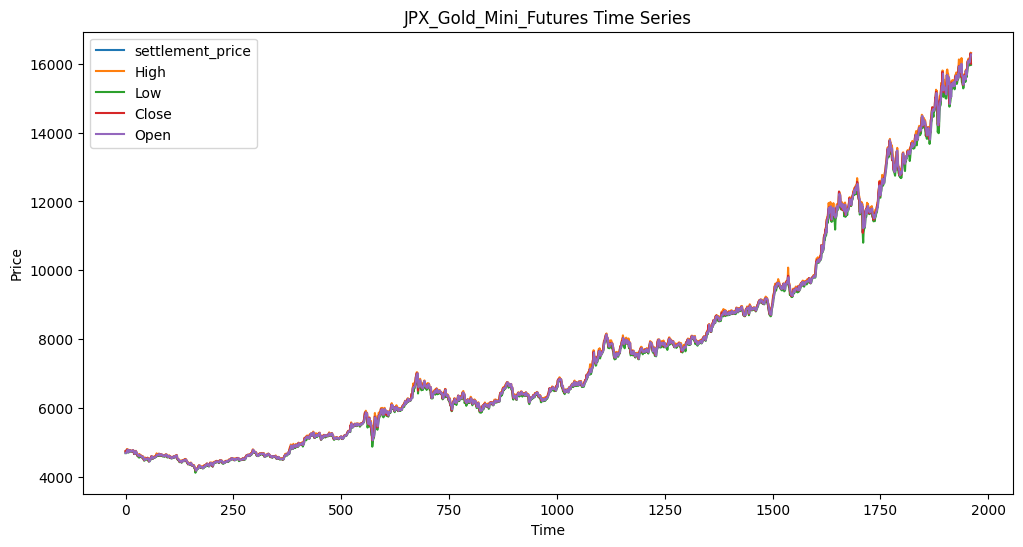

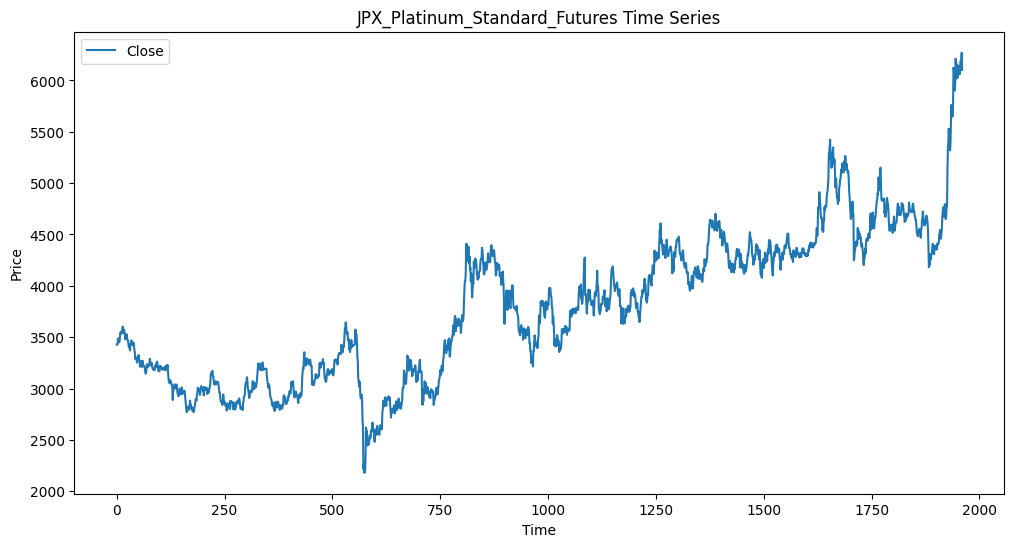

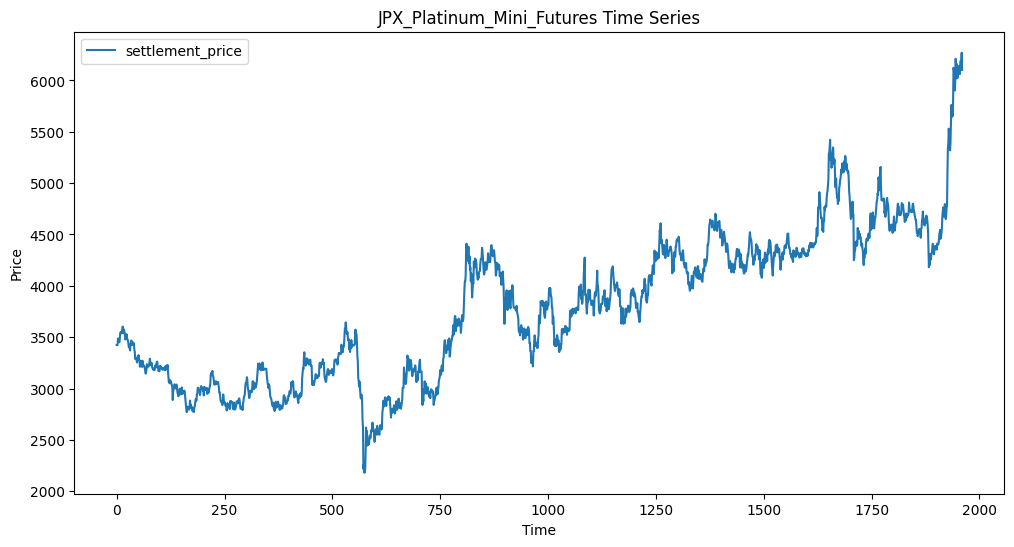

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de variables por instrumento
instruments = {
    'JPX_RSS3_Rubber_Futures': ['Close', 'settlement_price'],
    'JPX_Gold_Standard_Futures': ['Close', 'High', 'Low', 'Open'],
    'JPX_Gold_Mini_Futures': ['settlement_price', 'High', 'Low', 'Close', 'Open'],
    'JPX_Platinum_Standard_Futures': ['Close'],
    'JPX_Platinum_Mini_Futures': ['settlement_price']
}

# Asumiendo que tu columna temporal se llama 'Date' o 'Time'
time_col = 'date_id'  # Reemplaza si tu columna se llama diferente

# Función para graficar cada instrumento
def plot_instrument(df, instrument_name, variables):
    plt.figure(figsize=(12,6))
    for var in variables:
        col_name = f"{instrument_name}_{var}"
        if col_name in df.columns:
            plt.plot(df[time_col], df[col_name], label=var)
    plt.title(f"{instrument_name} Time Series")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Graficar todas las series
for instr, vars_list in instruments.items():
    plot_instrument(merged, instr, vars_list)


las series de tiempo analizadas muestran una tendencia creciente a lo largo del periodo observado, lo que indica que, pese a episodios de volatilidad y correcciones puntuales, los precios de los futuros tienden a subir en el largo plazo. Este comportamiento refleja cómo los mercados de commodities y activos relacionados suelen atravesar ciclos de alzas y bajas, pero con una dirección ascendente cuando se consideran intervalos más amplios. Además, el hecho de que las distintas variables (como close, open o settlement_price) se muevan de forma casi idéntica confirma que representan la misma dinámica subyacente del mercado, reforzando la idea de que una sola de ellas puede servir como indicador representativo del comportamiento general. En conjunto, estas gráficas sugieren un mercado que, aunque volátil en el corto plazo, mantiene una trayectoria de crecimiento sostenido en el tiempo.


Todos a excepción de la gráfica de caucho, esta muestra un comportamiento más cíclico y volátil que el de otros activos, ya que en lugar de mantener una tendencia ascendente sostenida, combina fases de caída inicial hacia niveles cercanos a 150 con posteriores recuperaciones que lo llevan a máximos de más de 400 antes de corregir nuevamente hacia la zona de 300. Esto refleja un mercado sensible a factores externos y cambios en la oferta y demanda, donde predominan los movimientos de expansión y contracción, lo que lo convierte en un activo con mayor riesgo y fuerte exposición a la volatilidad.